In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv(r"Sentimentanalysis")
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...


In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   ReviewSummary           568454 non-null  object
 9   ReviewText              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df.isnull().sum() 

Unnamed: 0                0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [6]:
#replacing null values with space in review summary column
df["ReviewSummary"]=df["ReviewSummary"].replace(np.nan," ") 

In [7]:
#now checking null values
df.isnull().sum()

Unnamed: 0                0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [8]:
# creating the new text column that combines both review summary and review text
df["text"]=df["ReviewSummary"]+" "+df["ReviewText"]
df.head() 

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...
1,1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t..."
3,3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...


In [9]:
df.columns=['UniqueRowNo', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText','text']

In [10]:
#making the unique row number column
df["UniqueRowNo"]=np.arange(1,df.shape[0]+1) 

In [11]:
df.head() 

,UniqueRowNo,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...


In [12]:
#creating helpfulness column which is the fraction of HelpFulnessNumerator and HelpfulnessDenominator
df["Helpfulness"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]

In [13]:
df['Helpfulness'].head()

0    1.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: Helpfulness, dtype: float64

In [14]:
#here we can see that helpfulness fraction contains nan,this is because 0/0 is not defined
# we can replace nan with zero
df["Helpfulness"]=df["Helpfulness"].replace(np.nan,0)
df["Helpfulness"] 

0         1.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
568449    0.0
568450    0.0
568451    1.0
568452    1.0
568453    0.0
Name: Helpfulness, Length: 568454, dtype: float64

In [15]:
#The HelpfulnessNumerator
print("Minimum value of Helpfulness",df["Helpfulness"].min())
print("Maximum value of Helpfulness",df["Helpfulness"].max())
print("Average value of Helpfulness",df["Helpfulness"].mean())
print("Standard deviation of Helpfulness",df["Helpfulness"].std()) 

Minimum value of Helpfulness 0.0
Maximum value of Helpfulness 3.0
Average value of Helpfulness 0.4078619474101317
Standard deviation of Helpfulness 0.46206838814307344


(array([3.11171e+05, 3.21600e+04, 3.55760e+04, 1.89545e+05, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

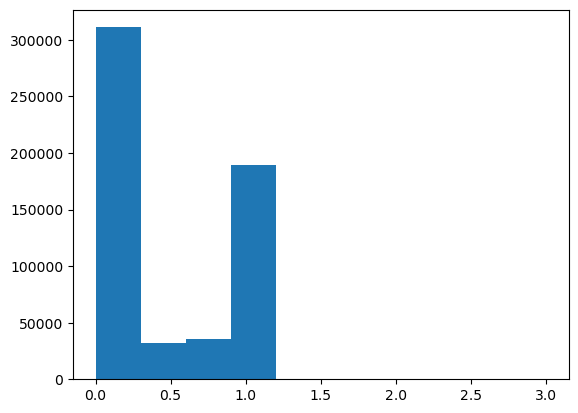

In [16]:
#distribution of helpfulness
plt.hist(df["Helpfulness"])

In [17]:
#creating a function to label Helpfulness
def helpful(value):
    if value>0.5:
        return ">0.5"
    elif value<0.5 and value>0.25:
        return "<0.5"
    else:
        return "Useless"
    

    

In [18]:
from tqdm import tqdm, tqdm_notebook

In [19]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [20]:
#creating new column for label encoding the helpfuness column
df["HelpfulnessLabel"]=df["Helpfulness"].progress_apply(lambda x:helpful(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568454/568454 [00:00<00:00, 603282.33it/s]


In [21]:
df.head()

,UniqueRowNo,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,text,Helpfulness,HelpfulnessLabel
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...,Good Quality Dog Food I have bought several ...,1.0,>0.5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanu...,Not as Advertised Product arrived labeled as...,0.0,Useless
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a f...,"""Delight"" says it all This is a confection t...",1.0,>0.5
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient ...,Cough Medicine If you are looking for the se...,1.0,>0.5
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wi...,Great taffy Great taffy at a great price. T...,0.0,Useless


In [22]:
df.shape

(568454, 13)

### machine learning 

In [23]:
X=df[["text"]]
y=df[["Score"]]  

In [24]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52) 

In [25]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(426340, 1) (426340, 1)
(142114, 1) (142114, 1)


In [26]:
# import nltk
# nltk.download('stopwords')
# # Downloading wordnet before applying Lemmatizer
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [27]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [28]:
##  Lemmatizer
lemmatizer = WordNetLemmatizer() 

In [29]:
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]

    # Lemmatization

    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [30]:
#concatenating the x train and  y train
train_data=pd.concat([X_train,y_train],axis=1)
train_data.head()

,text,Score
337276,Treats that spoil My 14 year old cat had a bad...,5
408872,I used to love Caribou coffee. Save your $$ he...,2
6238,Yummy but watch out... Absolute fantastic arom...,4
109842,Where's The Bacon? I'll simply say that I had ...,3
105103,Didn't Really Taste Like a Latte I tried this ...,1


In [31]:
new_df=train_data["text"].progress_apply(lambda x:preprocess(x))
new_df.head() 

100%|████████████████████████████████████████████████████████████████████████| 426340/426340 [2:59:59<00:00, 39.48it/s]


,0,1
337276,treat spoil year old cat bad bout pancreatitis...,23
408872,used love caribou coffee save many better k cu...,24
6238,yummy watch absolute fantastic aroma great tas...,70
109842,bacon simply say hoped little pronounced bacon...,43
105103,really taste like latte tried product really t...,136


In [32]:
new_df.columns=["cleaned_text","len_cleaned_text"]

In [33]:
new_df.head()

,cleaned_text,len_cleaned_text
337276,treat spoil year old cat bad bout pancreatitis...,23
408872,used love caribou coffee save many better k cu...,24
6238,yummy watch absolute fantastic aroma great tas...,70
109842,bacon simply say hoped little pronounced bacon...,43
105103,really taste like latte tried product really t...,136


In [34]:
train_data=pd.concat([train_data,new_df],axis=1)
train_data.head() 

,text,Score,cleaned_text,len_cleaned_text
337276,Treats that spoil My 14 year old cat had a bad...,5,treat spoil year old cat bad bout pancreatitis...,23
408872,I used to love Caribou coffee. Save your $$ he...,2,used love caribou coffee save many better k cu...,24
6238,Yummy but watch out... Absolute fantastic arom...,4,yummy watch absolute fantastic aroma great tas...,70
109842,Where's The Bacon? I'll simply say that I had ...,3,bacon simply say hoped little pronounced bacon...,43
105103,Didn't Really Taste Like a Latte I tried this ...,1,really taste like latte tried product really t...,136


In [35]:
train_data.isnull().sum()

text                0
Score               0
cleaned_text        0
len_cleaned_text    0
dtype: int64

In [36]:
#converting to csv
#train_data.to_csv("cleaned_train_data_score.csv") 

In [7]:
train_data=pd.read_csv("cleaned_train_data_score.csv")
train_data.head() 

,Unnamed: 0,text,Score,cleaned_text,len_cleaned_text
0,337276,Treats that spoil My 14 year old cat had a bad...,5,treat spoil year old cat bad bout pancreatitis...,23
1,408872,I used to love Caribou coffee. Save your $$ he...,2,used love caribou coffee save many better k cu...,24
2,6238,Yummy but watch out... Absolute fantastic arom...,4,yummy watch absolute fantastic aroma great tas...,70
3,109842,Where's The Bacon? I'll simply say that I had ...,3,bacon simply say hoped little pronounced bacon...,43
4,105103,Didn't Really Taste Like a Latte I tried this ...,1,really taste like latte tried product really t...,136


In [8]:
train_data.shape

(426340, 5)

In [9]:
train_data.isnull().sum()

Unnamed: 0          0
text                0
Score               0
cleaned_text        0
len_cleaned_text    0
dtype: int64

In [10]:
#seperating X train and y train
X_train=train_data["cleaned_text"]
y_train=train_data["Score"] 

In [11]:
X_train 

0         treat spoil year old cat bad bout pancreatitis...
1         used love caribou coffee save many better k cu...
2         yummy watch absolute fantastic aroma great tas...
3         bacon simply say hoped little pronounced bacon...
4         really taste like latte tried product really t...
                                ...                        
426335    best dog food market first found dog shelter s...
426336    get fiber pleasant way knew nothing kind bar s...
426337    nuala say buy well really nuala say arf occasi...
426338    disappointing heard nothing raf bar taste like...
426339    dogfood dogfood never recalled protein first t...
Name: cleaned_text, Length: 426340, dtype: object

In [12]:
#aaplying transformation on x train
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_transformed = vocab.fit_transform(X_train)


In [13]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_transformed))

print("Shape of input data:", X_train_transformed.shape)

Total unique words: 95672
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (426340, 95672)


In [14]:
X_train_transformed

<426340x95672 sparse matrix of type '<class 'numpy.int64'>'
	with 14663155 stored elements in Compressed Sparse Row format>

#### data cleaning on test data 

In [61]:
test_data=pd.concat([X_test,y_test],axis=1)
test_data.head()

,text,Score
479184,"Don't buy it used Its a great product, and our...",5
304707,contains preservatives This cheese has a good ...,4
92911,Great to have in spray but... I was thrilled t...,4
365944,Tastes Great! I'm not sure about the claims th...,5
85239,Terribly Dry I bought this muffin mix and foll...,1


In [62]:
temp_df=test_data["text"].progress_apply(lambda x:preprocess(x))


100%|██████████████████████████████████████████████████████████████████████████| 142114/142114 [43:58<00:00, 53.86it/s]


In [63]:
temp_df.head()

,0,1
479184,buy used great product dog love see amazon lis...,15
304707,contains preservative cheese good flavor conta...,20
92911,great spray thrilled finally get oil spray cos...,16
365944,taste great sure claim sour sop kill cancer ce...,17
85239,terribly dry bought muffin mix followed direct...,27


In [64]:
temp_df.columns=["cleaned_text","len_cleaned_text"]
temp_df.head() 

,cleaned_text,len_cleaned_text
479184,buy used great product dog love see amazon lis...,15
304707,contains preservative cheese good flavor conta...,20
92911,great spray thrilled finally get oil spray cos...,16
365944,taste great sure claim sour sop kill cancer ce...,17
85239,terribly dry bought muffin mix followed direct...,27


In [65]:
test_data=pd.concat([test_data,temp_df],axis=1)
test_data.head()

,text,Score,cleaned_text,len_cleaned_text
479184,"Don't buy it used Its a great product, and our...",5,buy used great product dog love see amazon lis...,15
304707,contains preservatives This cheese has a good ...,4,contains preservative cheese good flavor conta...,20
92911,Great to have in spray but... I was thrilled t...,4,great spray thrilled finally get oil spray cos...,16
365944,Tastes Great! I'm not sure about the claims th...,5,taste great sure claim sour sop kill cancer ce...,17
85239,Terribly Dry I bought this muffin mix and foll...,1,terribly dry bought muffin mix followed direct...,27


In [66]:
#converting test data to csv
#test_data.to_csv("cleaned_test_data_score.csv")

In [82]:
test_data.isnull().sum()

text                0
sentiment           0
cleaned_text        0
len_cleaned_text    0
dtype: int64

In [15]:
test_data=pd.read_csv("cleaned_test_data_Score.csv")
test_data.head()  

,Unnamed: 0,text,Score,cleaned_text,len_cleaned_text
0,479184,"Don't buy it used Its a great product, and our...",5,buy used great product dog love see amazon lis...,15
1,304707,contains preservatives This cheese has a good ...,4,contains preservative cheese good flavor conta...,20
2,92911,Great to have in spray but... I was thrilled t...,4,great spray thrilled finally get oil spray cos...,16
3,365944,Tastes Great! I'm not sure about the claims th...,5,taste great sure claim sour sop kill cancer ce...,17
4,85239,Terribly Dry I bought this muffin mix and foll...,1,terribly dry bought muffin mix followed direct...,27


In [16]:
test_data.shape

(142114, 5)

In [17]:
test_data.isnull().sum()

Unnamed: 0          0
text                0
Score               0
cleaned_text        1
len_cleaned_text    0
dtype: int64

In [19]:
##since there is one missing value in cleaned_text column we will drop that row
test_data.dropna(inplace=True) 

In [21]:
test_data.isnull().sum() 

Unnamed: 0          0
text                0
Score               0
cleaned_text        0
len_cleaned_text    0
dtype: int64

In [23]:
#seperating X_test and y_test from above data
X_test=test_data["cleaned_text"]
y_test=test_data["Score"] 

In [24]:
#transforming the test data
# using the same vocab instance of TfidfCountVectorizer to only transform the xtest data
X_test_transformed = vocab.transform(X_test)  

#### Model buiding 

In [25]:
import time 

In [18]:
import sys 

In [26]:
from sklearn.linear_model import LogisticRegression
LG_classifier=LogisticRegression()
st=time.time()
LG_classifier.fit(X_train_transformed,y_train)
et=time.time()
time_taken=et-st
print("The total time taken to train this model : ",time_taken)


The total time taken to train this model :  60.45006608963013


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
#========MAKING PREDICTIONS USING LOGISTIC REGRESION MODEL==========

st=time.time()
y_test_pred = LG_classifier.predict(X_test_transformed) 
et=time.time()

print("The total time taken for prediction : ",et-st)


The total time taken for prediction :  0.10332322120666504


In [28]:

from sklearn.metrics import accuracy_score

accuracy_LR=accuracy_score(y_test, y_test_pred)

print(accuracy_LR)

0.7549203802607783


In [29]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier()

st=time.time()
DT_classifier.fit(X_train_transformed,y_train)
et=time.time() 
time_taken=et-st
print("The total time taken to train this model : ",et-st)


The total time taken to train this model :  2289.9035692214966


In [30]:
st=time.time()
y_test_pred = DT_classifier.predict(X_test_transformed) 
et=time.time()

print("The total time taken for prediction : ",et-st)

The total time taken for prediction :  0.2779371738433838


In [31]:
from sklearn.metrics import accuracy_score

accuracy_DT=accuracy_score(y_test, y_test_pred)

print(accuracy_DT)

0.7610633791419504


In [32]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier()

st=time.time()
RF_classifier.fit(X_train_transformed,y_train)
et=time.time() 

print("The total time taken to train this model : ",et-st)
 

The total time taken to train this model :  12970.537742853165


In [33]:
st=time.time()
y_test_pred = RF_classifier.predict(X_test_transformed) 
et=time.time()

print("The total time taken for prediction : ",et-st)

The total time taken for prediction :  27.824716329574585


In [34]:
from sklearn.metrics import accuracy_score

accuracy_RF=accuracy_score(y_test, y_test_pred)

print(accuracy_RF) 

0.8011230499672796


#### SAVING THE MODELS 

In [36]:
import pickle 

In [38]:
filename_1="trained_LR_model_score.sav"
pickle.dump(LG_classifier,open(filename_1,"wb")) 

In [39]:
filename_2="trained_DT_model_score.sav"
pickle.dump(DT_classifier,open(filename_2,"wb")) 

In [40]:
filename_3="trained_RF_model_score.sav"
pickle.dump(RF_classifier,open(filename_3,"wb")) 

#### MAKING A DATAFRAME THAT SHOWS THE PROPERTIES OF MODEL

In [53]:
model=["LG_classifier","DT_classifier","RF_classifier"]
accuracy=[accuracy_LR,accuracy_DT,accuracy_RF]
training_time=[60.45,2289.90,12970.54]
prediction_time=[0.1033,0.277,27.824] 
size=[3738,13740,2647556]
df_bow_score=pd.DataFrame({"Model":model,"Accuracy":accuracy,"TrainingTime":training_time,
                          "PredictionTime":prediction_time,"Size(kb)":size}) 
df_bow_score.head()  

,Model,Accuracy,TrainingTime,PredictionTime,Size(kb)
0,LG_classifier,0.754920,60.45,0.1033,3738
1,DT_classifier,0.761063,2289.90,0.2770,13740
2,RF_classifier,0.801123,12970.54,27.8240,2647556


In [54]:
df_bow_score["Accuracy"]=df_bow_score["Accuracy"]*100  

In [55]:
df_bow_score

,Model,Accuracy,TrainingTime,PredictionTime,Size(kb)
0,LG_classifier,75.492038,60.45,0.1033,3738
1,DT_classifier,76.106338,2289.90,0.2770,13740
2,RF_classifier,80.112305,12970.54,27.8240,2647556


In [56]:
#df_bow_score.to_csv("df_bow_score.csv")

<Axes: xlabel='Accuracy', ylabel='Model'>

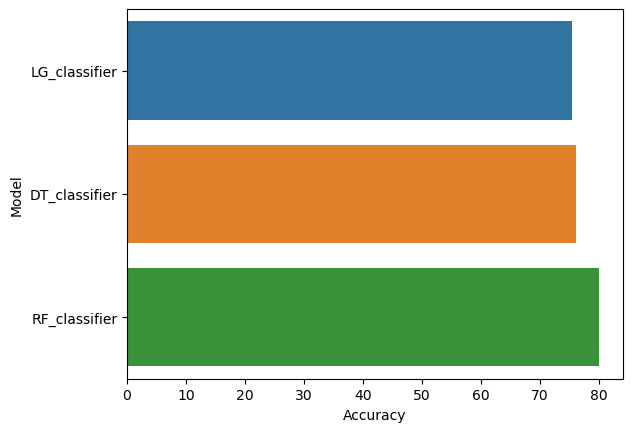

In [57]:
sns.barplot(data=df_bow_score,x="Accuracy",y="Model")  

<Axes: xlabel='Model', ylabel='TrainingTime'>

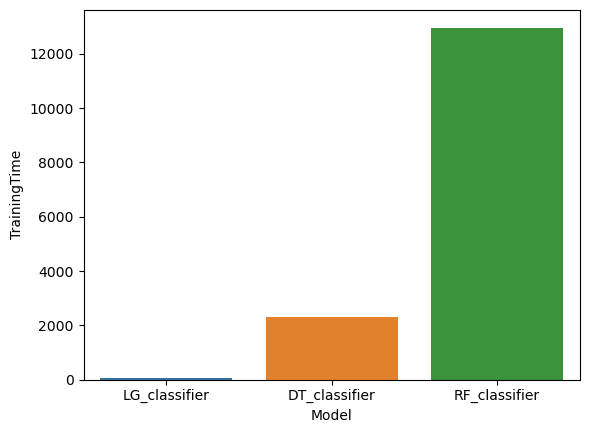

In [58]:
sns.barplot(data=df_bow_score,x="Model",y="TrainingTime")  

<Axes: xlabel='Model', ylabel='PredictionTime'>

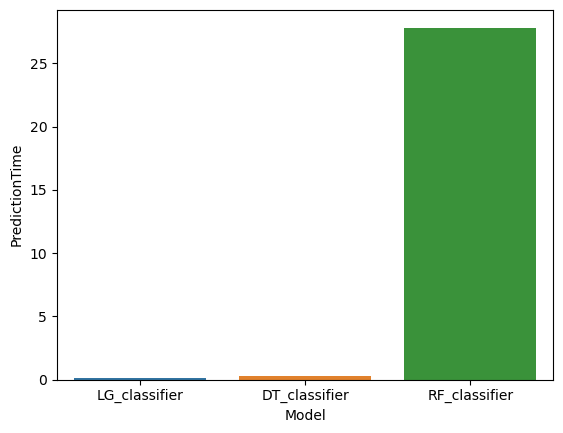

In [59]:
sns.barplot(data=df_bow_score,x="Model",y="PredictionTime")  

<Axes: xlabel='Model', ylabel='Size(kb)'>

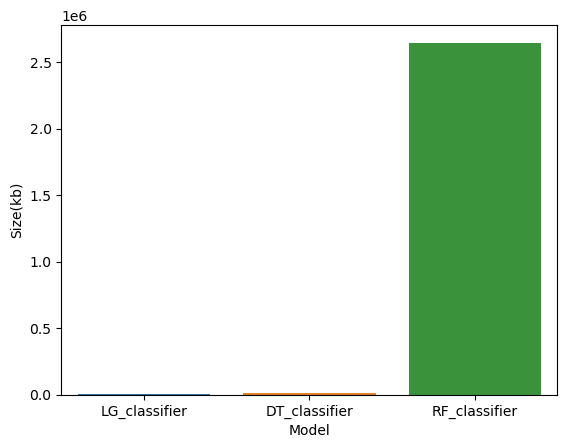

In [60]:
sns.barplot(data=df_bow_score,x="Model",y="Size(kb)")  